# Exploration of MNIST dataset

## Import libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist 


## Load MNIST data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Display a sample of images

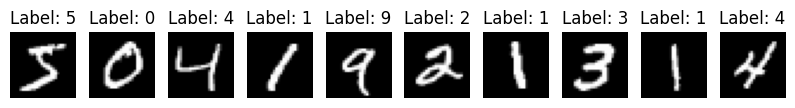

In [4]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

## Describe the dataset

In [5]:
print(f"Number of training examples: {len(x_train)}")
print(f"Number of test examples: {len(x_test)}")
print(f"Image shape: {x_train[0].shape}")
print(f"Unique labels: {np.unique(y_train)}")

Number of training examples: 60000
Number of test examples: 10000
Image shape: (28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


##  Visualize the distribution of labels

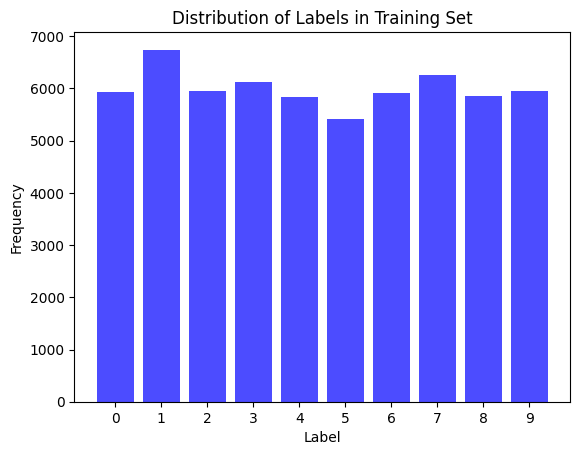

In [6]:
plt.figure()
plt.hist(y_train, bins=np.arange(11) - 0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.show()


The highest number of labels in the training set is for the image of the number 1, and the lowest is for 5.

## Greyscale distribution example

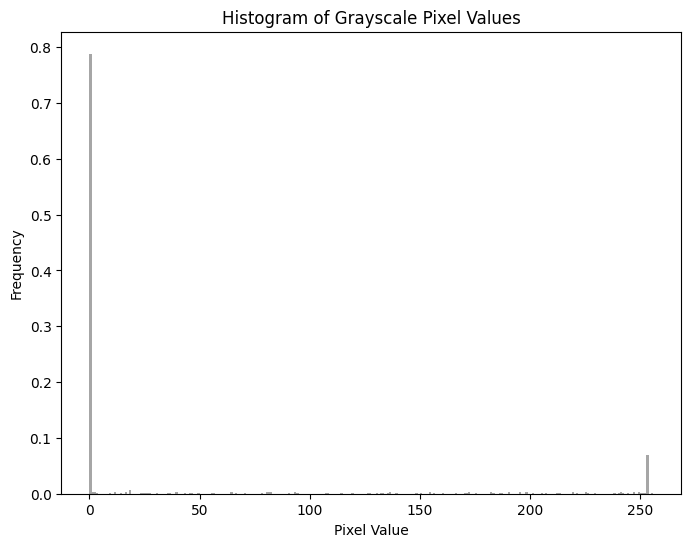

In [7]:
# Example image for analysis
example_image = x_train[0]

# Flatten the 2D image into a 1D array
pixel_values = example_image.flatten()

# Create a histogram of pixel values
plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=256, range=(0, 256), density=True, color='gray', alpha=0.7)
plt.title('Histogram of Grayscale Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


Due to the nature if these images, the most common pixel color is black (0), which is the background and the second most common color is white (225), which is the number. There are some in-between values, which are greys and probably are on the outline o the numbers.

## Pixel intensity statistics

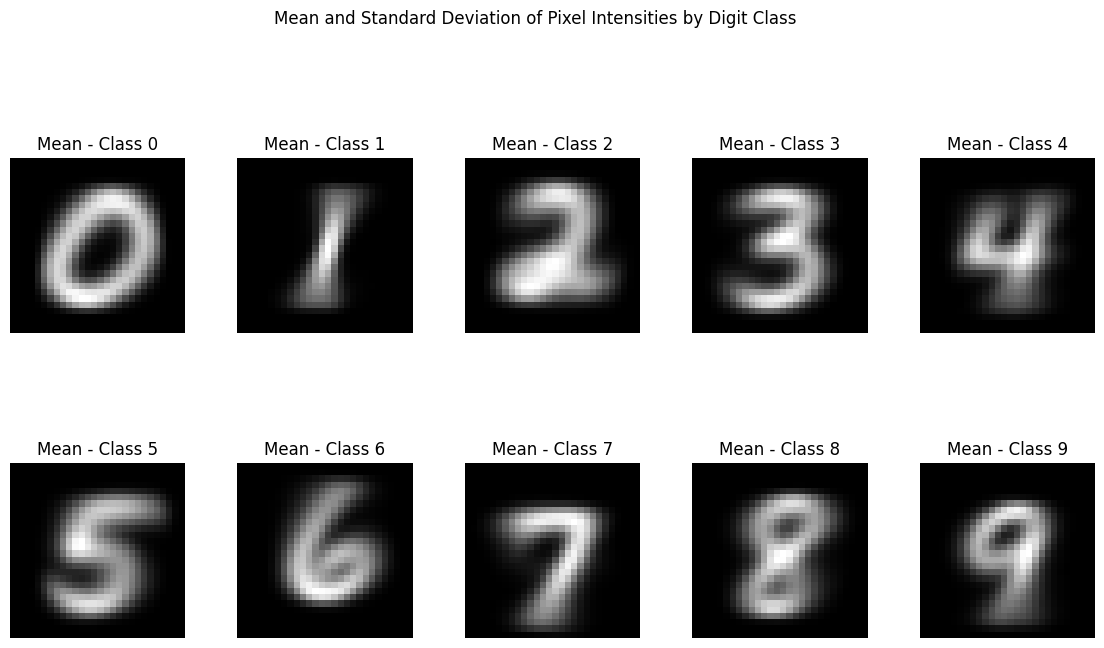

In [8]:
#Computing mean and standard deviation of pixel intensities for each digit class
class_pixel_stats = []

for digit_class in range(10):
    class_images = x_train[y_train == digit_class]
    class_mean = np.mean(class_images, axis=0)
    class_std = np.std(class_images, axis=0)
    class_pixel_stats.append((class_mean, class_std))

# Visualize the mean and standard deviation for each digit class
fig, axes = plt.subplots(2, 5, figsize=(14, 7))
fig.suptitle('Mean and Standard Deviation of Pixel Intensities by Digit Class', y=1.05)

for i in range(2):
    for j in range(5):
        index = i * 5 + j
        axes[i, j].imshow(class_pixel_stats[index][0], cmap='gray')
        axes[i, j].set_title(f'Mean - Class {index}')
        axes[i, j].axis('off')

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Most of the numbers are centered around the same pixels in each class. Their average gives a blurry image of the numbers.

## Image variability

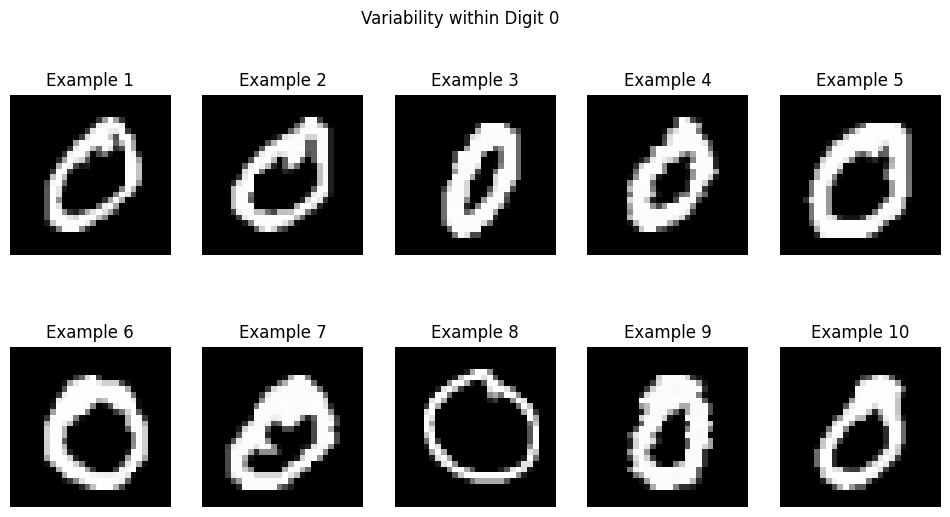

In [9]:
# Choosing a digit class to visualize 
selected_digit = 0

# Get indices of images with the selected digit
digit_indices = np.where(y_train == selected_digit)[0]

# Display multiple examples of the selected digit
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    index = digit_indices[i]
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Example {i + 1}")
    plt.axis('off')

plt.suptitle(f"Variability within Digit {selected_digit}")
plt.show()

As handwriting varies, the images of the numbers vary as well. 